# Fourier series, transforms and analysis

## Fourier series

As you may have heard in a variety of contexts (e.g. PHYS 133!) we can decompose any periodic function or periodic signal into the weighted sum of a (possibly infinite) set of simple oscillating functions, namely sines and cosines (or, equivalently, complex exponentials). 

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

This is possible because the trigonometric functions for a *set of complete, orthogonal basis vectors* that span the space.

---
# DISCUSSION

1. Discuss with your neighbor 3 other functions that you *could* use instead?
1. Where have you used these functions before?

---

### Square wave centered at $x=0$

We will start with a square wave centered at $x=0$. This is the same kind of wave you would find in a function generator, for example.

In [5]:
%matplotlib inline
import numpy as np
import scipy.signal as signal    # Notice this one is new!
import matplotlib.pyplot as plt

We will use these a lot so just defining them here might be useful

In [2]:
pi = np.pi
x  = np.linspace(-3*pi, 3*pi, 1000)

Next we want to make a very simple plot, so let's set it up

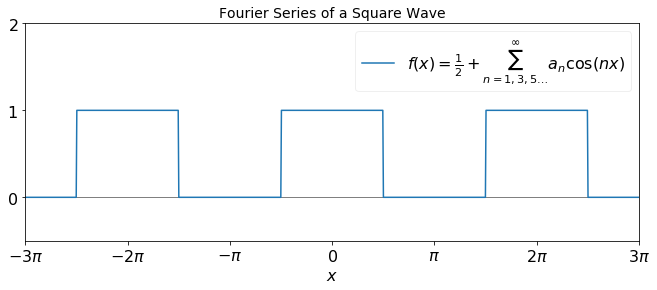

In [4]:
plt.axhline(0, color='gray', lw=1)

plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')

plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

## Calculating the coefficients

But we didn't show how to calculate $a_n$! This becomes slightly more obvious if we change our Fourier Series Equation

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

where

$$
\omega_0 =\frac{2\pi}{T}
$$

and $T$ is the fundamental period (for the square wave above, $T=2\pi$)

The equation for $a_n$ becomes:

$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

### Simplifying the expression

For the square wave above, the limits are only $-T/4$ to $T/4$ because $f(x)=0$ for the rest of the wavelength.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

Next, because $\cos(nx)$ is even, we can reduce the limits to $0$ to $T/4$ and multiply by $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

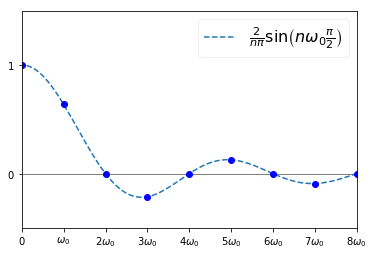

In [9]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')

an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]

plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')

plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])

plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### What if we make the squares farther apart by making $T=4\pi$ ?

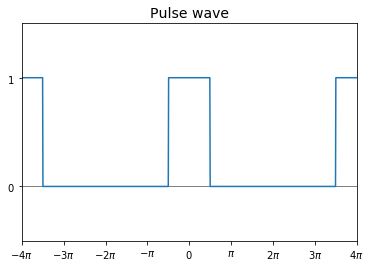

In [10]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

### The new fundamental frequency becomes $\omega'_0 =\omega_0/2$ 
### The $a_n$ coefficients become

$$
a_n = \frac{4}{n\omega'_0 T} \sin \left(n\omega'_0\frac{T}{8}\right)
$$

$$
a_n = \frac{2}{n\pi} \sin \left(n \omega'_0 \frac{\pi}{2} \right)
$$

### Since the fundametal frequency is cut in half, the spacing between coefficients are closer, but bound by the same envelope

In [ ]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### If $\omega_0' \rightarrow \omega_0/10$

In [ ]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
n = 0.1
nprime = np.arange(n, 10, n)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### The Fourier Series becomes the Fourier Transform when
$$
T \rightarrow \infty, \qquad \omega_0 \rightarrow 0
$$

## Sawtooth wave

Consider a sawtooth wave

$$
\begin{align}
s(x) &= {\frac {x}{\pi }},\quad \mathrm {for} -\pi <x<\pi ,\\
s ( x + 2 π k ) &= s ( x ) ,\quad \mathrm{for} −\pi < x < \pi 
\end{align}
$$

In this case, the Fourier coefficients are given by

$$
\begin{align}
a_{m}&{}={\frac {1}{\pi }}\int _{-\pi }^{\pi }s(x)\cos(mx)\,dx=0,\quad n\geq 0.\\
b_{m}&{}={\frac {1}{\pi }}\int _{-\pi }^{\pi }s(x)\sin(mx)\,dx\\
&=-{\frac {2}{\pi m}}\cos(m\pi )+{\frac {2}{\pi ^{2}m^{2}}}\sin(m\pi )\\
&={\frac {2\,(-1)^{m+1}}{\pi m}},\quad m\geq 1.
\end{align}
$$

It can be proven that Fourier series converges to $s(x)$ at every point $x$ where $s$ is differentiable, and therefore:

$$
\begin{align}
s(x)&={\frac {a_{0}}{2}}+\sum _{m=1}^{\infty }\left[a_{m}\cos \left(mx\right)+b_{n}\sin \left(mx\right)\right]\\
&={\frac {2}{\pi }}\sum _{m=1}^{\infty }{\frac {(-1)^{m+1}}{m}}\sin(mx),\quad \mathrm {for} \quad x-\pi \notin 2\pi \mathbf {Z} 
\end{align}
$$

When $x = \pi$, the Fourier series converges to 0, which is the half-sum of the left- and right-limit of $s$ at $x = \pi$. 

This is a particular instance of the Dirichlet theorem for Fourier series. 

In [ ]:
m_initial = 2                                 
T_period  = 2.

In [ ]:
def Fourier(M,T,t):                      # M = number waves, T = period, t = time
    sumy  = 0                            # initialize the output                 
    omega = 2.*np.pi/T_period            # Omega = 2pi/T
    sign  = 1                            # Sign of the coefficient                                     
    for m in range(1,M):                 # M variable selected with slider
        sumy += sign * np.sin(m*omega*t) # value of the function after adding next term                     
        sign = -sign                     # swap the sign of the coefficient    
    sumy = (2.0/np.pi)*sumy              # Common factor in front of the sum
    return sumy

In [ ]:
fig, ax = plt.subplots()
t  = np.arange(0.0, np.pi, 0.01)               
t1 = np.arange(0.0,T_period/2,0.01)               
t2 = t[100:300]                               
f1 = t1                                 
f2 = t2-T_period                                  
s  = 0 
plt.plot(t1,f1)                                 
plt.plot(t2,f2,color='b')    


plt.axis([0, np.pi, -4.0, 4.0])             # minx, maxx, miny, maxy
plt.xlabel('Time')                                        
plt.ylabel('Signal')                                      
plt.title('Fourier Synthesis of Sawtooth function')
plt.grid(True) 

In [ ]:
s = Fourier(m_initial, T_period,t)   
fig.gca()
lines, = plt.plot(t, s, lw=1, color='red')

In [ ]:
numwaves = 40
s_new = Fourier(int(numwaves),T_period,t)
ydata = s_new
lines.set_ydata(ydata)
plt.draw()
plt.show()